<a href="https://colab.research.google.com/github/vps123456740/Machine-Learning/blob/main/Medical_Insurance_cost_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Data Collection and Analysis

In [2]:
id=pd.read_csv('/content/insurance.csv')

In [3]:
id.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
id.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
id.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [15]:
id.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-16-d4414c27f255>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(id['age'])


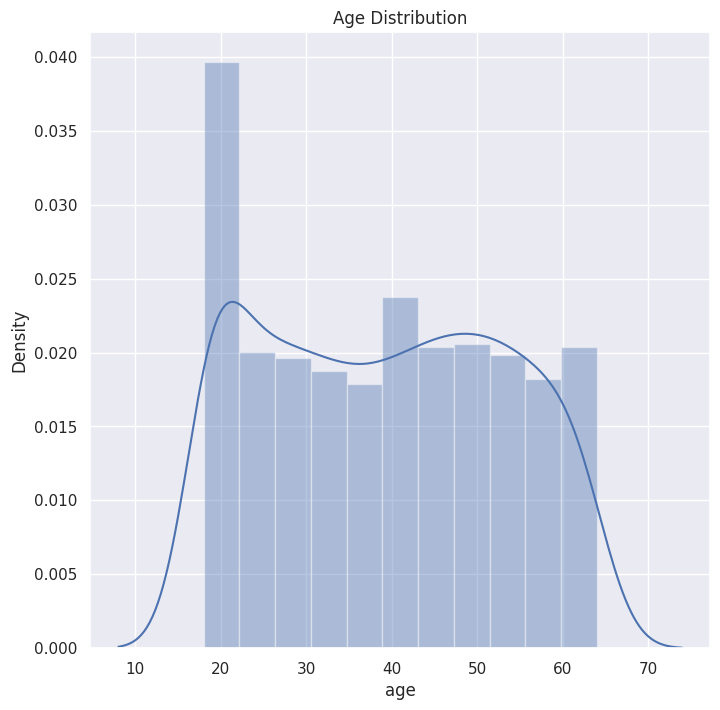

In [16]:
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(id['age'])
plt.title('Age Distribution')
plt.show()

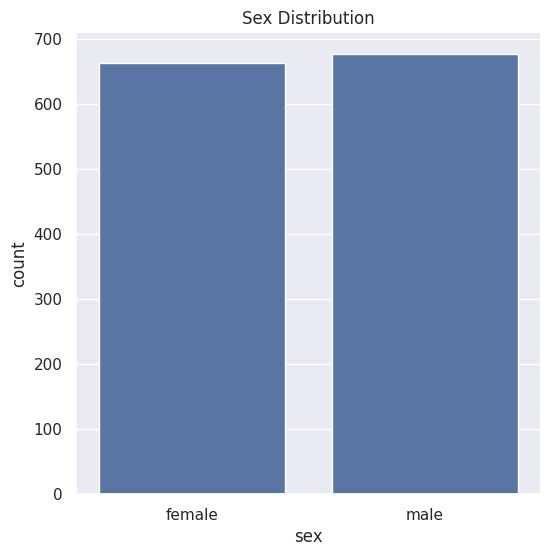

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=id)
plt.title('Sex Distribution')
plt.show()

In [18]:
id['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-19-f73183b6f756>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(id['bmi'])


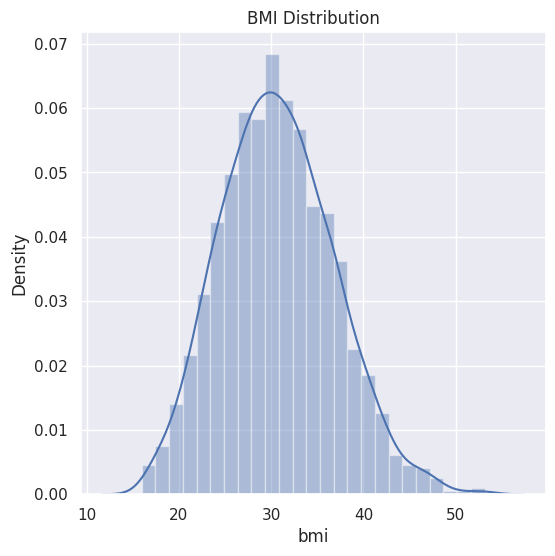

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(id['bmi'])
plt.title('BMI Distribution')
plt.show()

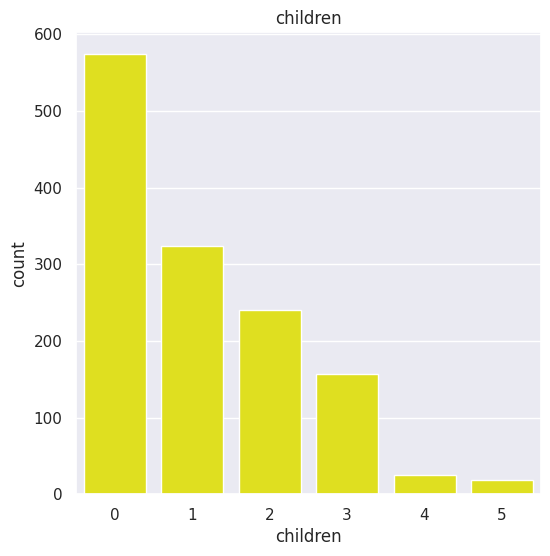

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=id,color='yellow')
plt.title('children')
plt.show()

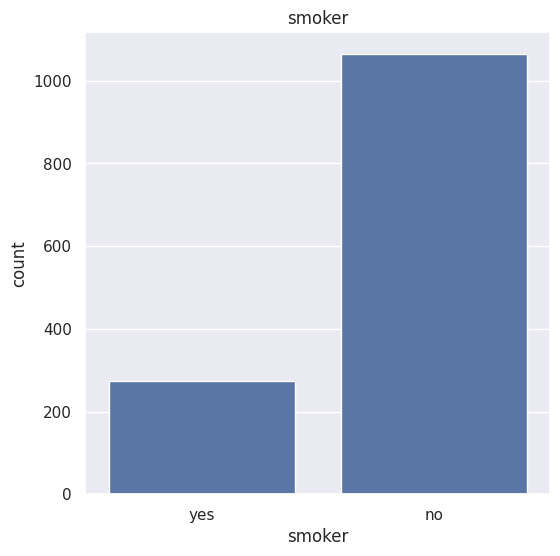

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=id)
plt.title('smoker')
plt.show()

In [26]:
id['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


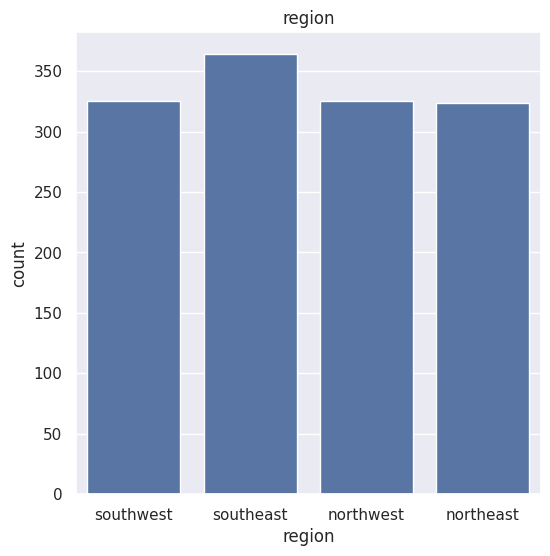

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=id)
plt.title('region')
plt.show()

In [28]:
id['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-29-0a3f1c68f36b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(id['charges'])


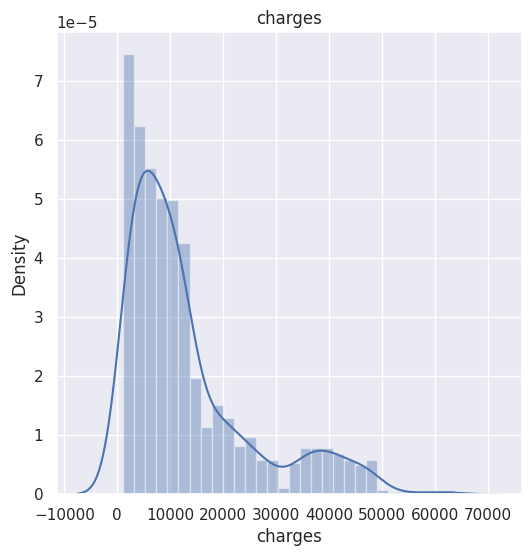

In [29]:
plt.figure(figsize=(6,6))
sns.distplot(id['charges'])
plt.title('charges')
plt.show()

In [34]:
id.replace({'sex':{'male':0,'female':1}},inplace=True)
id.replace({'smoker':{'yes':0,'no':1}},inplace=True)
id.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

<ipython-input-34-fdcf5214914b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  id.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


Splitting the Features and Target

In [35]:
X=id.drop('charges',axis=1)
Y=id['charges']

In [32]:
print(X)

      age  sex     bmi  children  smoker     region
0      19    1  27.900         0       0  southwest
1      18    0  33.770         1       1  southeast
2      28    0  33.000         3       1  southeast
3      33    0  22.705         0       1  northwest
4      32    0  28.880         0       1  northwest
...   ...  ...     ...       ...     ...        ...
1333   50    0  30.970         3       1  northwest
1334   18    1  31.920         0       1  northeast
1335   18    1  36.850         0       1  southeast
1336   21    1  25.800         0       1  southwest
1337   61    1  29.070         0       0  northwest

[1338 rows x 6 columns]


In [36]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into training and testing data

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [38]:
model=LinearRegression()

In [39]:
model.fit(X_train,Y_train)

LinearRegression()

In [40]:
training_data_prediction=model.predict(X_train)


In [41]:
r2_train=metrics.r2_score(Y_train,training_data_prediction)

In [44]:
print(r2_train)

0.751505643411174


In [45]:
testing_data_prediction=model.predict(X_test)

In [46]:
r2_test=metrics.r2_score(Y_test,testing_data_prediction)
print(r2_test)

0.7447273869684076


Building a Predictive System

In [47]:
input_data=(31,1,25.74,0,1,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [49]:
prediction=model.predict(input_data_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
print(prediction)

[3760.0805765]
